# Model 4 report

Model 4 implements logistic regression with the python library sklearn.

Pca is used in this model (with n_components = 0.95).

The parameters for the LogisticRegression algorithm used the default values:

regularizer = l2

C = 1.0

solver = liblinear

multi_class = ovr

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
import os
sys.path.append("../src/")

from preprocess_data import *
from sk_logistic import *
from utils import *
%matplotlib inline
os.chdir("../")

The dataset contains images of 43 different traffing signs.
The images contained in the provided dataset has a problem with the number of examples per class. Some of the classes contains only two or three images, for that reason, when splitting the data for training and testing, the splitting algorithm randomly selected 80% for training and 20% for testing in each class folder. Due to this, in the testing set some of the classes are not present (i.e. 31, 19, 37, 0). In my opinion it is a better option to split the data in this way because it guarantees that the model can predict all 43 classes (which cannot be done using a standard train_test_split() function).

Afther dividing the training and testing sets, data augmentation was carried out on the training set. This step was not done before splitting the data to prevent overfitting while combining augmented images on the training and testing sets. In this way we can guarantee that the model has never seen the images of the test set nor a transformed form of it.

In [2]:
# Load the data
cwd = os.getcwd()
train_folder = os.path.join(os.getcwd(), "images", "train")
train_images, train_labels = load_dataset(train_folder, img_size=32) #Load the training data
os.chdir(cwd)

  9%|▉         | 441/5010 [00:00<00:01, 4406.63it/s]

#============ Loading Data ============#


100%|██████████| 5010/5010 [00:00<00:00, 5168.21it/s]


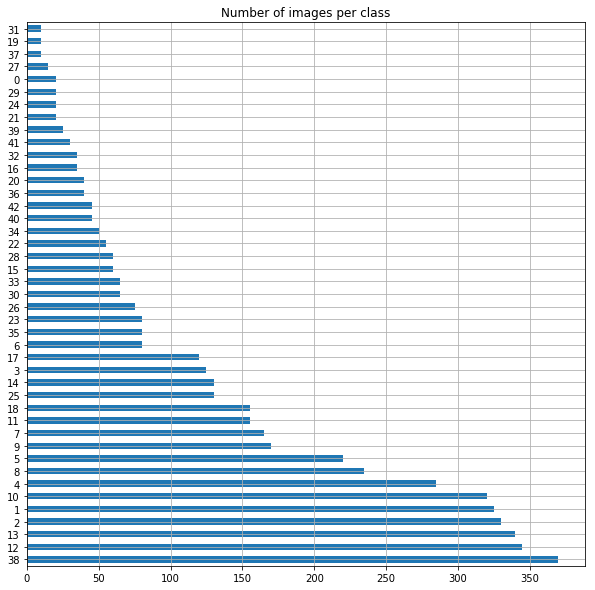

In [3]:
# Plot the distribution of the triaining data
matplotlib.rcParams['figure.figsize'] = [10, 10]
df = pd.Series(train_labels)
df.value_counts().plot('barh', grid=True, title="Number of images per class")

We can see that the classes are highly unbalanced and when the model evaluates the test data, it will missclassify the classes with fewer training images.
The data augmentation process creates 4 new images from every single image. For example if a class has originally 2 images, after augmentation it will have 10 images (2x4 + 2).


# Train accuracy

The accuracy obtained by the model on the training set is 92.25%.

In [4]:
# Calculate the accuracy on the training data
train_preds = evaluate_sk_logistic(d=train_folder, mode="train")
train_preds = np.array(train_preds)

  9%|▉         | 451/5010 [00:00<00:01, 4506.60it/s]

#============ Loading Data ============#


100%|██████████| 5010/5010 [00:00<00:00, 5420.51it/s]


Number of training examples = 5010
X_train shape: 
Y_train shape: 
# ============Loading model. ==============#
#============== train accuracy: 0.9225548902195608 ==============#


In [5]:
# Compare predictions with real labels
true_train_preds = np.equal(train_labels, train_preds)
df_preds = pd.DataFrame({"true_label":train_labels, "prediction":train_preds, "is_equal":true_train_preds})

To see more clear what is happening, we are going to compare the correct number of predictions per class. But first we look at exactly how many training examples are per class

In [6]:
df1 = df_preds.groupby("true_label")["true_label"].agg(["count"])
print(df1)

            count
true_label       
0              20
1             325
2             330
3             125
4             285
5             220
6              80
7             165
8             235
9             170
10            320
11            155
12            345
13            340
14            130
15             60
16             35
17            120
18            155
19             10
20             40
21             20
22             55
23             80
24             20
25            130
26             75
27             15
28             60
29             20
30             65
31             10
32             35
33             65
34             50
35             80
36             40
37             10
38            370
39             25
40             45
41             30
42             45


Then compare the how many predictions were correct and incorrect per class

In [7]:
df2 = df_preds.groupby(["true_label","is_equal"]).agg(["count"])
print(df2)

                    prediction
                         count
true_label is_equal           
0          False             4
           True             16
1          False            40
           True            285
2          False            40
           True            290
3          False            33
           True             92
4          False            38
           True            247
5          False            69
           True            151
6          True             80
7          False            23
           True            142
8          False            25
           True            210
9          False            15
           True            155
10         False             1
           True            319
11         False             6
           True            149
12         False             2
           True            343
13         False             9
           True            331
14         True            130
15         False             6
        

Plotting the difference shown in the data above we get:

In [8]:
def info_predictions(y_true, y_pred):
    data = {}
    for i in range(43):
        count_equal = 0
        count_diff = 0
        for j in range(len(y_true)):
            if y_true[j] == y_pred[j] == i:
                count_equal += 1
            elif y_true[j] == i != y_pred[j]:
                count_diff += 1
        data[i] = [count_equal, count_diff]
    
    df = pd.DataFrame(data).transpose()
    df.columns = ["equal", "not_equal"]
    return df

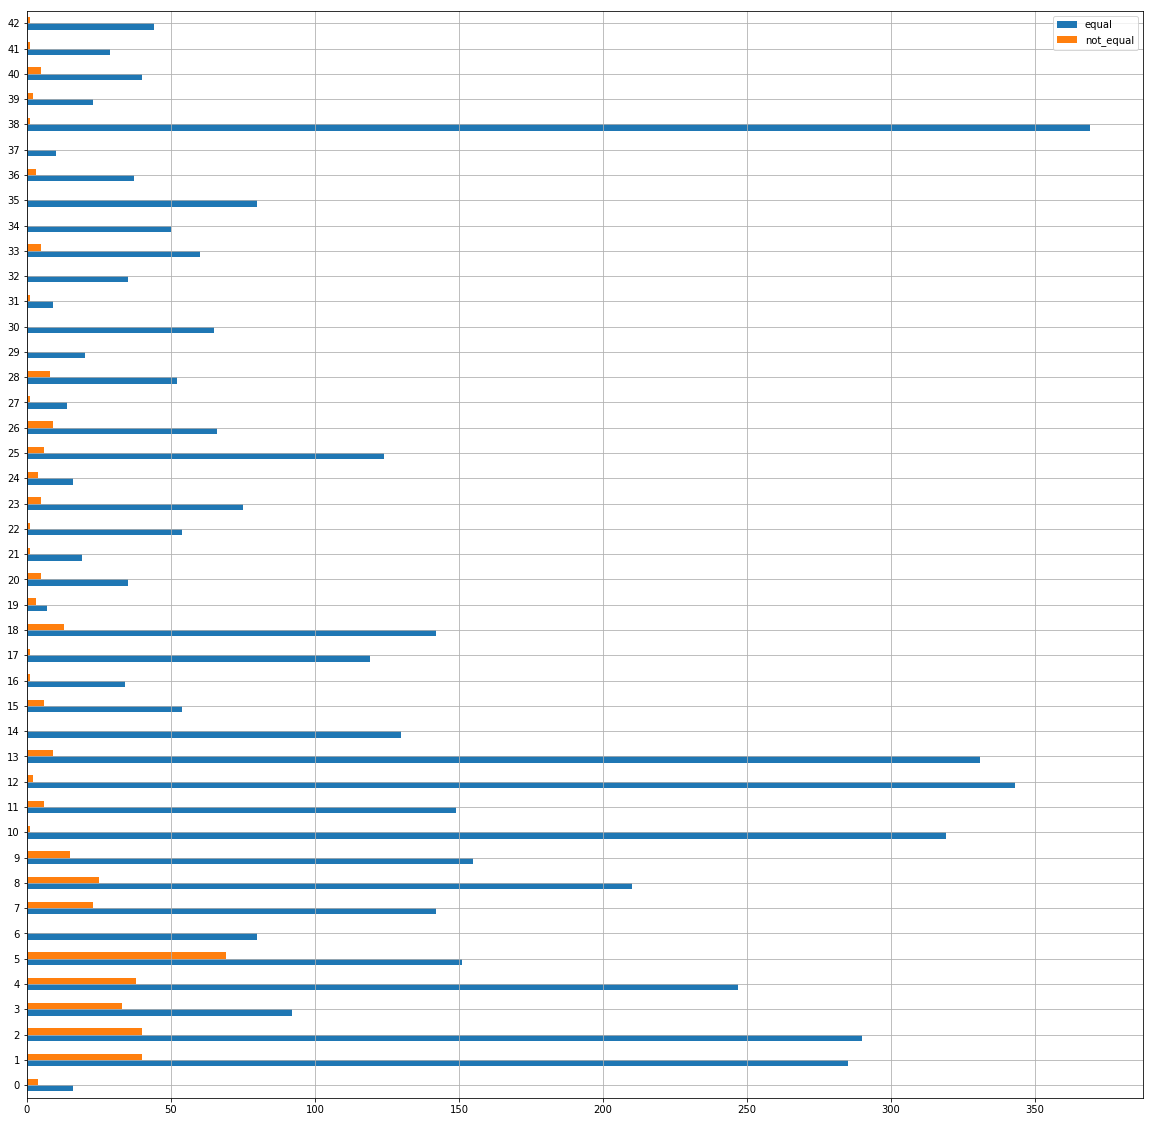

In [9]:
matplotlib.rcParams['figure.figsize'] = [20, 20]
df = info_predictions(train_labels, train_preds)
df.plot(kind = "barh", grid=True)

It looks like the classifier is working reasonably well, but it may be overfitting the training data. 

The classes with small training data seem to be classified correctly most of the time. 

# Test accuracy

The accuracy obtained by the model on the testing set is 78.67%.

In [10]:
test_folder = os.path.join(os.getcwd(), "images", "test")
test_images, test_labels = load_dataset(test_folder, img_size=32) #Load the testing data
os.chdir(cwd)

100%|██████████| 211/211 [00:00<00:00, 2428.60it/s]

#============ Loading Data ============#


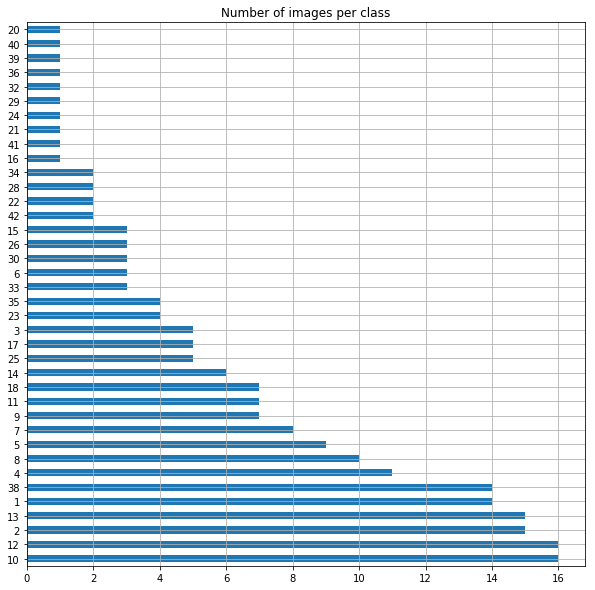

In [11]:
matplotlib.rcParams['figure.figsize'] = [10, 10]
df = pd.Series(test_labels)
df.value_counts().plot('barh', grid=True, title="Number of images per class")

In [12]:
test_preds = evaluate_sk_logistic(d=test_folder, mode="test")
test_preds = np.array(test_preds)

100%|██████████| 211/211 [00:00<00:00, 4139.26it/s]

#============ Loading Data ============#
Number of testing examples = 211
X_test shape: 
Y_test shape: 
# ============Loading model. ==============#
#============== test accuracy: 0.7867298578199052 ==============#


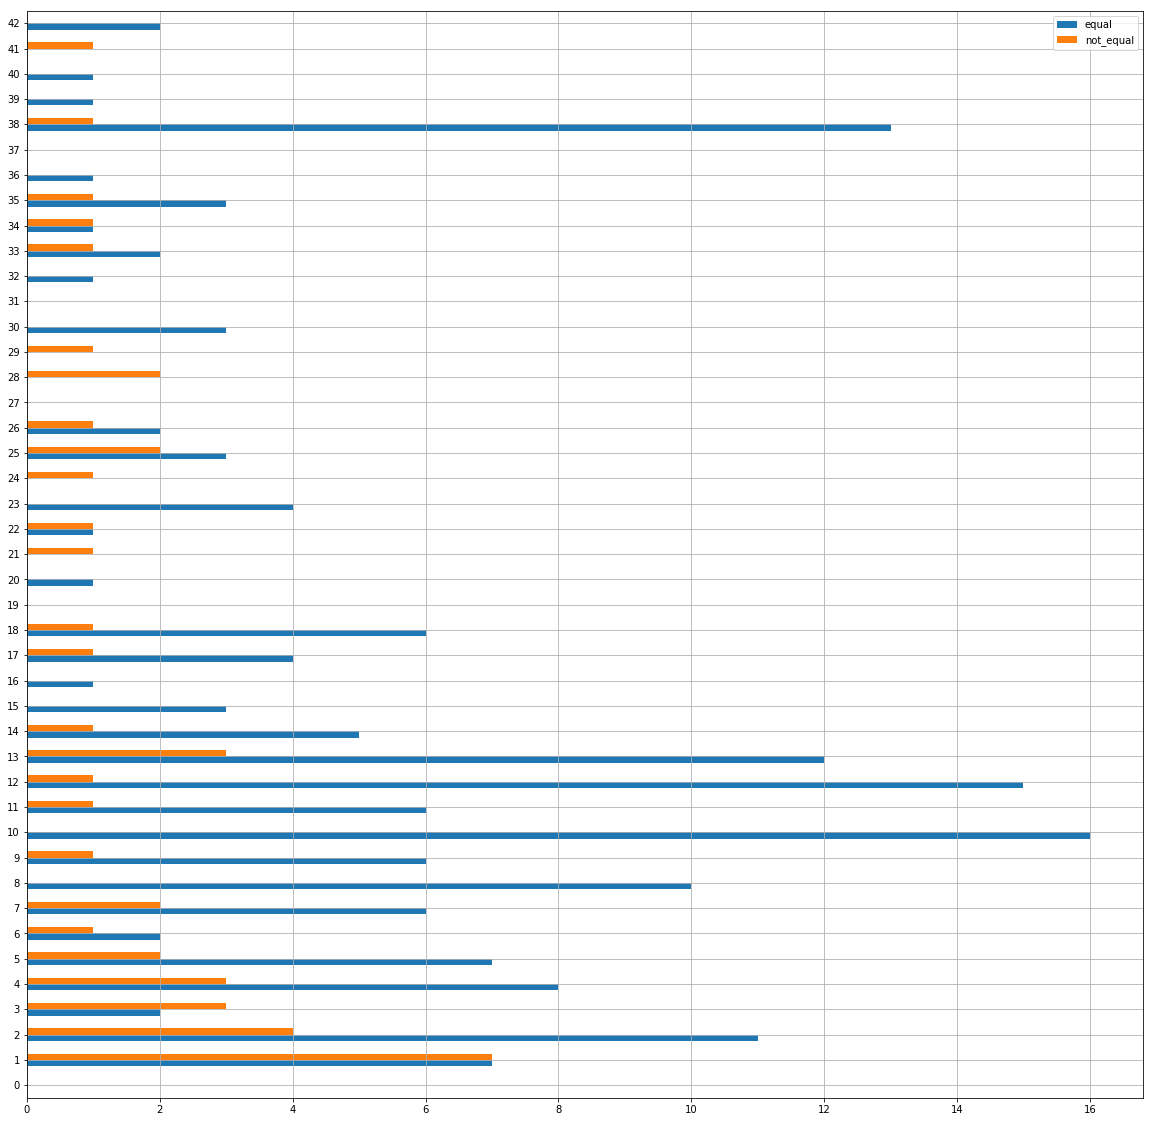

In [13]:
matplotlib.rcParams['figure.figsize'] = [20, 20]
df = info_predictions(test_labels, test_preds)
df.plot(kind = "barh", grid=True)

We see that results obtained during testing are different from the ones obtained during training.
Much more classes were missclassified and we can see that classes with smaller training data are the ones that decreases the accuracy value.
The classes that have the most training data are the ones with better testing performance.

# Conclusions:

Testing data is guaranteed that has never been seen by the model. 

The model works reasonably well given it's simplicity and the small training database. The model suffers from overfittng given that training accuracy is 92,25% and the testing accuracy is 78,67%.